In [5]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from enhancer.options import *
from enhancer.training.lr_finder import *
from enhancer.losses import WassFeatureLoss,FeatureLoss
opt_path = "../configs/smallmodel/mse_train.yml"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
model = get_generator_from_yml(opt_path)
criterion =  nn.L1Loss()
dataloader = get_dataloader_from_yml(opt_path)
trainloader = dataloader["train_dataloader"]

generator is loaded from /notebooks/pixelEnhancer/checkpoints/imdn_rtc_20_6_mse.pt


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


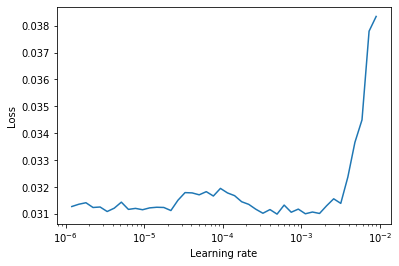

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=0)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot()